In [5]:
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

import cv2

import os
import tensorflow as tf
import tensorflow_hub as hub
# Load compressed models from tensorflow_hub
os.environ['TFHUB_MODEL_LOAD_FORMAT'] = 'COMPRESSED'

# load simple target image

In [6]:
resize_to=256

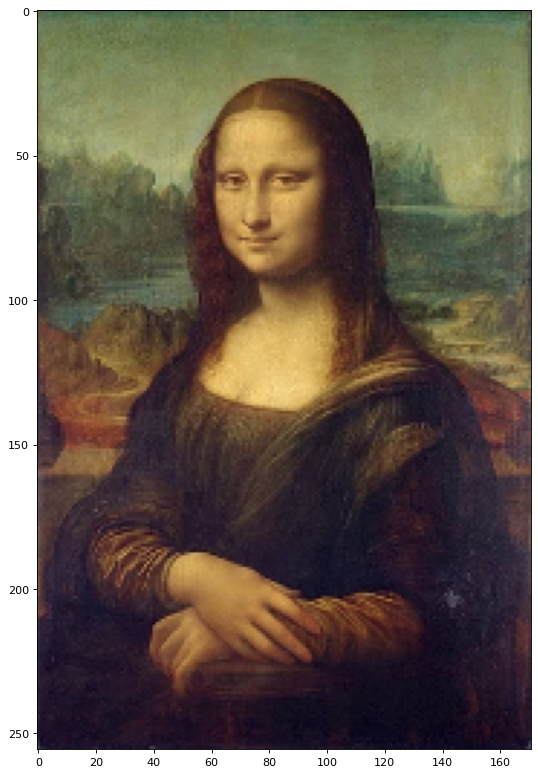

In [16]:
#target_img=cv2.imread('./Mona_Lisa,_by_Leonardo_da_Vinci,_from_C2RMF.jpg')
target_img=cv2.imread('../input/mona.png')
target_img=cv2.cvtColor(target_img, cv2.COLOR_BGR2RGB)
#target_img=cv2.cvtColor(target_img, cv2.COLOR_RGB2GRAY)
#target_img=target_img[300:-400, 300:-300] # cut borders

hw_ratio=target_img.shape[1]/target_img.shape[0]
target_img=cv2.resize(target_img, (int(hw_ratio*resize_to), resize_to)) # widtxXheight
target_img=np.asarray(target_img)/255


figure(figsize=(16, 12), dpi=80)
plt.imshow(target_img)#, cmap='gray')
plt.show()

# if you want, apply style transfer on your target image, to run ES on e.g. your custom photo

In [4]:
hub_module = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')

KeyboardInterrupt: 

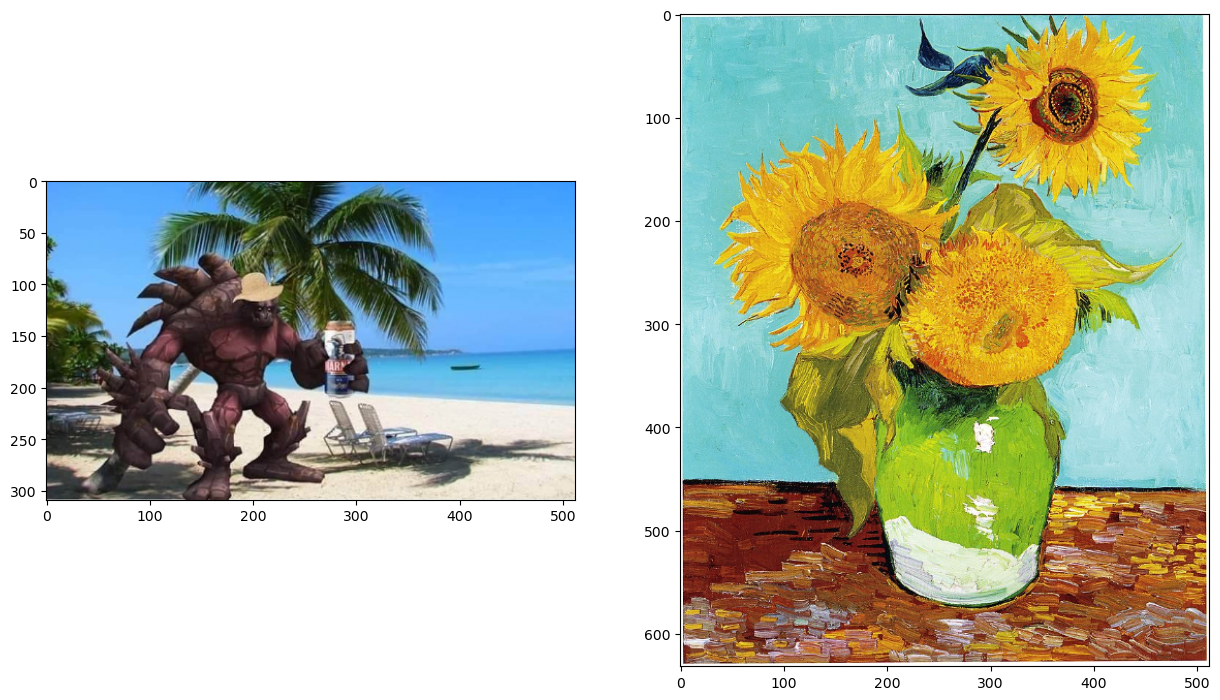

In [ ]:
resize_to=512
#style_img=cv2.imread('./Mona_Lisa,_by_Leonardo_da_Vinci,_from_C2RMF.jpg')
style_img=cv2.imread('./sunflowers.jpg')
style_img=cv2.cvtColor(style_img, cv2.COLOR_BGR2RGB)
#style_img=style_img[300:-400, 300:-300] # cut borders

style_hw_ratio=style_img.shape[0]/style_img.shape[1]
style_img=cv2.resize(style_img, (resize_to, int(style_hw_ratio*resize_to))) # widtxXheight
style_img=np.asarray(style_img)/255

content_img=cv2.imread('./skalniak.jpg')
content_img=cv2.cvtColor(content_img, cv2.COLOR_BGR2RGB)
#content_img=content_img[300:-400, 300:-300] # cut borders

content_hw_ratio=content_img.shape[0]/content_img.shape[1]
content_img=cv2.resize(content_img, (resize_to, int(content_hw_ratio*resize_to))) # widtxXheight
content_img=np.asarray(content_img)/255

fig, axs = plt.subplots(1, 2, figsize=(15,10))
axs[0].imshow(content_img)
axs[1].imshow(style_img)
plt.show()

In [ ]:
content_img = content_img.astype(np.float32)[np.newaxis, ...]
style_img = style_img.astype(np.float32)[np.newaxis, ...]

In [ ]:
target_img=hub_module(tf.constant(content_img, dtype=tf.float32), tf.constant(style_img, dtype=tf.float32))[0][0]
target_img=np.asarray(target_img)

In [ ]:
#np.save('./skalniak_styled_np', target_img)

In [ ]:
cv2.imshow('sloneczny_skalniak', target_img)

QObject::moveToThread: Current thread (0x559fb68a75a0) is not the object's thread (0x559fd7d743d0).
Cannot move to target thread (0x559fb68a75a0)

QObject::moveToThread: Current thread (0x559fb68a75a0) is not the object's thread (0x559fd7d743d0).
Cannot move to target thread (0x559fb68a75a0)

QObject::moveToThread: Current thread (0x559fb68a75a0) is not the object's thread (0x559fd7d743d0).
Cannot move to target thread (0x559fb68a75a0)

QObject::moveToThread: Current thread (0x559fb68a75a0) is not the object's thread (0x559fd7d743d0).
Cannot move to target thread (0x559fb68a75a0)

QObject::moveToThread: Current thread (0x559fb68a75a0) is not the object's thread (0x559fd7d743d0).
Cannot move to target thread (0x559fb68a75a0)

QObject::moveToThread: Current thread (0x559fb68a75a0) is not the object's thread (0x559fd7d743d0).
Cannot move to target thread (0x559fb68a75a0)

QObject::moveToThread: Current thread (0x559fb68a75a0) is not the object's thread (0x559fd7d743d0).
Cannot move to tar

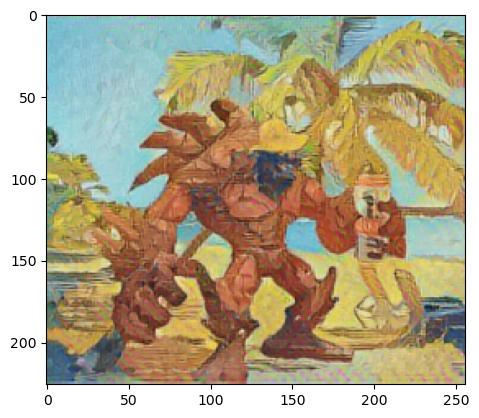

In [ ]:
plt.imshow(target_img)
plt.show()

## resize target
style transfer results are highly dependent on content/style resolution

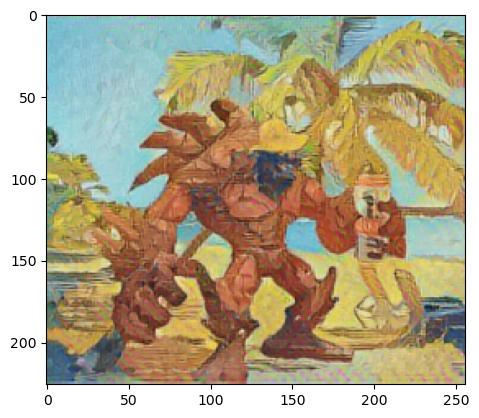

In [ ]:
resize_to=256
hw_ratio=target_img.shape[0]/target_img.shape[1]
target_img=cv2.resize(target_img, (resize_to, int(hw_ratio*resize_to))) # widtxXheight
plt.imshow(target_img)
plt.show()

# optional, move target image to gray for faster evaluation

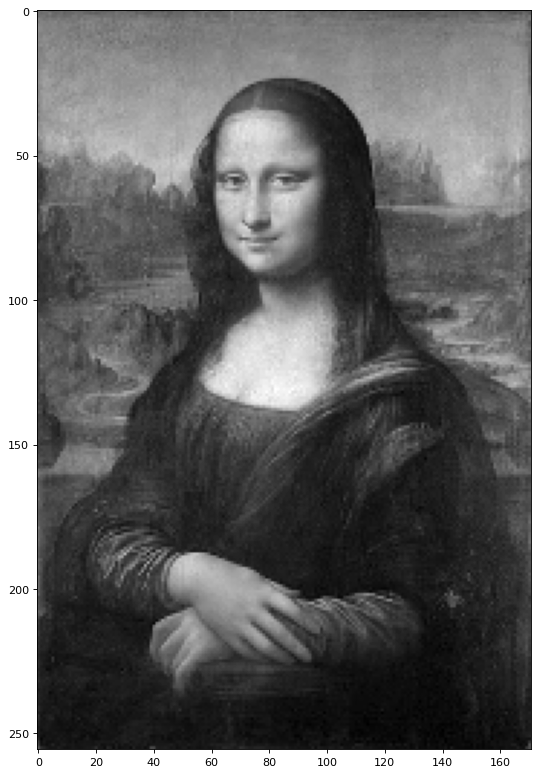

In [17]:
#target_img=cv2.imread('./Mona_Lisa,_by_Leonardo_da_Vinci,_from_C2RMF.jpg')
target_img=cv2.imread('../input/mona.png')
target_img=cv2.cvtColor(target_img, cv2.COLOR_BGR2GRAY)
#target_img=cv2.cvtColor(target_img, cv2.COLOR_RGB2GRAY)
#target_img=target_img[300:-400, 300:-300] # cut borders

hw_ratio=target_img.shape[1]/target_img.shape[0]
target_img=cv2.resize(target_img, (int(hw_ratio*resize_to), resize_to)) # widtxXheight
target_img=np.asarray(target_img)/255


figure(figsize=(16, 12), dpi=80)
plt.imshow(target_img, cmap='gray')
plt.show()

# ES

In [8]:
from ES import SquareEvolutionStrategy, CircleEvolutionStrategy

In [18]:
'''
__init__(self, 
                initial_chromosome_length,
                genotype_length,
                population_size, 
                 
                target_img,
                gray=False,
                ):
train(number_of_iterations=30000, 
              number_of_parents=6, 
              number_of_offspring_per_parent=3, 
              max_chromosome_length=256,
              initial_sigma_scale=5e-2,
              log_frequency=1,
              pararell=True
             ):
'''

es_model=SquareEvolutionStrategy(initial_chromosome_length=8,
                           genotype_length=7,
                           population_size=16,
                           target_img=target_img,
                           gray=True)



In [28]:
# uncoment to load pretrained population
c='''prev_pop=np.load('./population_color.npy')
prev_sigmas=np.load('./sigmas_color.npy')
prev_backgrounds=np.load('./population_background_color.npy')

es_model.population=prev_pop.copy()
es_model.sigmas=prev_sigmas.copy()
es_model.population_background=prev_backgrounds.copy()

es_model.times_circles_were_added=1150'''

  0%|          | 0/300000 [00:00<?, ?it/s]

Iteration 0000 : best score = 353.20035941, mean score = 355.12568300.


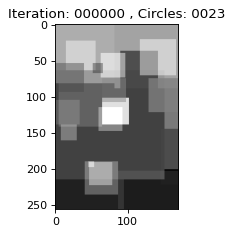

  0%|          | 112/300000 [00:01<1:06:57, 74.64it/s]

Adding circles 16th time. 
                                      
 Split target image into 4 rectangles.
                                      
 Radius_scale=0.19823986317056053


  0%|          | 307/300000 [00:04<1:06:02, 75.63it/s]

Adding circles 17th time. 
                                      
 Split target image into 4 rectangles.
                                      
 Radius_scale=0.1949590218937863


  0%|          | 414/300000 [00:05<1:05:23, 76.36it/s]

Adding circles 18th time. 
                                      
 Split target image into 4 rectangles.
                                      
 Radius_scale=0.19195872000656014


  0%|          | 514/300000 [00:06<1:04:05, 77.87it/s]

Adding circles 19th time. 
                                      
 Split target image into 4 rectangles.
                                      
 Radius_scale=0.18920035951687003


  0%|          | 612/300000 [00:08<1:05:12, 76.52it/s]

Adding circles 20th time. 
                                      
 Split target image into 4 rectangles.
                                      
 Radius_scale=0.18665241123894338


  0%|          | 711/300000 [00:09<1:04:20, 77.52it/s]

Adding circles 21th time. 
                                      
 Split target image into 16 rectangles.
                                      
 Radius_scale=0.18428883314870617


  0%|          | 810/300000 [00:10<1:04:53, 76.84it/s]

Adding circles 22th time. 
                                      
 Split target image into 16 rectangles.
                                      
 Radius_scale=0.18208790046993825


  0%|          | 993/300000 [00:13<1:02:24, 79.86it/s]

Adding circles 23th time. 
                                      
 Split target image into 16 rectangles.
                                      
 Radius_scale=0.18003132665669264
Iteration 1000 : best score = 294.20012740, mean score = 294.21965407.


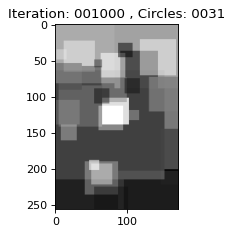

  0%|          | 1109/300000 [00:14<1:10:07, 71.03it/s]

Adding circles 24th time. 
                                      
 Split target image into 16 rectangles.
                                      
 Radius_scale=0.1781035935540111


  0%|          | 1210/300000 [00:15<1:03:52, 77.97it/s]

Adding circles 25th time. 
                                      
 Split target image into 16 rectangles.
                                      
 Radius_scale=0.17629143438888212


  0%|          | 1309/300000 [00:17<1:04:29, 77.18it/s]

Adding circles 26th time. 
                                      
 Split target image into 16 rectangles.
                                      
 Radius_scale=0.17458343004804494


  0%|          | 1412/300000 [00:18<1:03:38, 78.20it/s]

Adding circles 27th time. 
                                      
 Split target image into 16 rectangles.
                                      
 Radius_scale=0.1729696904450771


  1%|          | 1511/300000 [00:19<1:04:47, 76.78it/s]

Adding circles 28th time. 
                                      
 Split target image into 16 rectangles.
                                      
 Radius_scale=0.17144160057391347


  1%|          | 1611/300000 [00:21<1:05:09, 76.32it/s]

Adding circles 29th time. 
                                      
 Split target image into 16 rectangles.
                                      
 Radius_scale=0.16999161628691403


  1%|          | 1759/300000 [00:22<1:04:04, 77.57it/s]

Adding circles 30th time. 
                                      
 Split target image into 16 rectangles.
                                      
 Radius_scale=0.1686130986895011


  1%|          | 1864/300000 [00:24<1:08:01, 73.04it/s]

Adding circles 31th time. 
                                      
 Split target image into 16 rectangles.
                                      
 Radius_scale=0.16730017881017412


  1%|          | 1961/300000 [00:25<1:07:46, 73.29it/s]

Adding circles 32th time. 
                                      
 Split target image into 16 rectangles.
                                      
 Radius_scale=0.16604764621593782


  1%|          | 1994/300000 [00:26<1:04:46, 76.67it/s]

Iteration 2000 : best score = 261.46499010, mean score = 261.55470986.


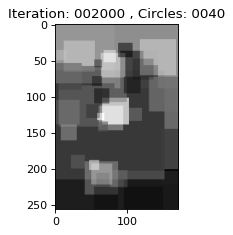

  1%|          | 2060/300000 [00:27<1:05:58, 75.26it/s]

Adding circles 33th time. 
                                      
 Split target image into 16 rectangles.
                                      
 Radius_scale=0.16485085672216038


  1%|          | 2165/300000 [00:28<1:07:07, 73.95it/s]

Adding circles 34th time. 
                                      
 Split target image into 16 rectangles.
                                      
 Radius_scale=0.16370565544521565


  1%|          | 2310/300000 [00:30<1:07:08, 73.89it/s]

Adding circles 35th time. 
                                      
 Split target image into 16 rectangles.
                                      
 Radius_scale=0.16260831227163416


  1%|          | 2408/300000 [00:31<1:06:13, 74.90it/s]

Adding circles 36th time. 
                                      
 Split target image into 16 rectangles.
                                      
 Radius_scale=0.16155546744299637


  1%|          | 2509/300000 [00:32<1:05:56, 75.20it/s]

Adding circles 37th time. 
                                      
 Split target image into 16 rectangles.
                                      
 Radius_scale=0.16054408543402138


  1%|          | 2662/300000 [00:35<1:06:46, 74.21it/s]

Adding circles 38th time. 
                                      
 Split target image into 16 rectangles.
                                      
 Radius_scale=0.15957141566993818


  1%|          | 2760/300000 [00:36<1:05:00, 76.20it/s]

Adding circles 39th time. 
                                      
 Split target image into 16 rectangles.
                                      
 Radius_scale=0.15863495891559604


  1%|          | 2866/300000 [00:37<1:02:39, 79.03it/s]

Adding circles 40th time. 
                                      
 Split target image into 16 rectangles.
                                      
 Radius_scale=0.15773243839286438


  1%|          | 2958/300000 [00:38<1:04:41, 76.53it/s]

Adding circles 41th time. 
                                      
 Split target image into 16 rectangles.
                                      
 Radius_scale=0.156861774859441


  1%|          | 3000/300000 [00:39<1:03:22, 78.10it/s]

Iteration 3000 : best score = 230.78682332, mean score = 230.83277772.


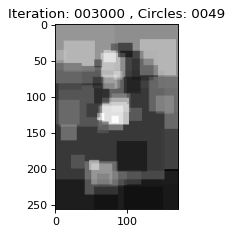

  1%|          | 3065/300000 [00:40<1:07:06, 73.75it/s]

Adding circles 42th time. 
                                      
 Split target image into 16 rectangles.
                                      
 Radius_scale=0.15602106502222501


  1%|          | 3162/300000 [00:41<1:04:50, 76.31it/s]

Adding circles 43th time. 
                                      
 Split target image into 16 rectangles.
                                      
 Radius_scale=0.15520856277015513


  1%|          | 3260/300000 [00:42<1:08:42, 71.97it/s]

Adding circles 44th time. 
                                      
 Split target image into 16 rectangles.
                                      
 Radius_scale=0.15442266280111014


  1%|          | 3361/300000 [00:44<1:06:08, 74.75it/s]

Adding circles 45th time. 
                                      
 Split target image into 16 rectangles.
                                      
 Radius_scale=0.15366188628986424


  1%|          | 3514/300000 [00:46<1:07:41, 73.00it/s]

Adding circles 46th time. 
                                      
 Split target image into 16 rectangles.
                                      
 Radius_scale=0.15292486830283214


  1%|          | 3607/300000 [00:47<1:11:45, 68.84it/s]

Adding circles 47th time. 
                                      
 Split target image into 16 rectangles.
                                      
 Radius_scale=0.15221034671324338


  1%|          | 3708/300000 [00:48<1:13:14, 67.42it/s]

Adding circles 48th time. 
                                      
 Split target image into 16 rectangles.
                                      
 Radius_scale=0.1515171524096389


  1%|▏         | 3812/300000 [00:50<1:08:39, 71.89it/s]

Adding circles 49th time. 
                                      
 Split target image into 16 rectangles.
                                      
 Radius_scale=0.15084420062289414


  1%|▏         | 3913/300000 [00:51<1:11:33, 68.96it/s]

Adding circles 50th time. 
                                      
 Split target image into 16 rectangles.
                                      
 Radius_scale=0.15019048322368797


  1%|▏         | 3994/300000 [00:52<1:07:10, 73.43it/s]

Iteration 4000 : best score = 203.76344374, mean score = 203.84680441.


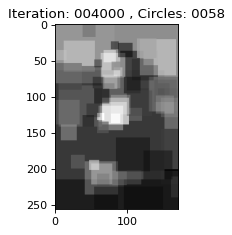

  1%|▏         | 4058/300000 [00:53<1:09:27, 71.01it/s]

Adding circles 51th time. 
                                      
 Split target image into 16 rectangles.
                                      
 Radius_scale=0.14955506186451523


  1%|▏         | 4156/300000 [00:55<1:04:54, 75.97it/s]

Adding circles 52th time. 
                                      
 Split target image into 16 rectangles.
                                      
 Radius_scale=0.14893706185882832


  1%|▏         | 4260/300000 [00:56<1:07:57, 72.53it/s]

Adding circles 53th time. 
                                      
 Split target image into 16 rectangles.
                                      
 Radius_scale=0.14833566670536175


  1%|▏         | 4364/300000 [00:57<1:08:07, 72.32it/s]

Adding circles 54th time. 
                                      
 Split target image into 16 rectangles.
                                      
 Radius_scale=0.1477501131786861


  1%|▏         | 4460/300000 [00:59<1:08:34, 71.83it/s]

Adding circles 55th time. 
                                      
 Split target image into 64 rectangles.
                                      
 Radius_scale=0.14717968691798522


  2%|▏         | 4556/300000 [01:00<1:05:22, 75.32it/s]

Adding circles 56th time. 
                                      
 Split target image into 64 rectangles.
                                      
 Radius_scale=0.14662371845531105
Interrupted


In [20]:
best_solution_objective_value, best_solution, best_solution_background,\
log_objective_values, log_best_solutions, log_best_backgrounds , \
log_sigmas_mean = es_model.train(
                                  number_of_iterations=300000,
                                  number_of_parents=6, 
                                  number_of_offspring_per_parent=3, 
                                  max_chromosome_length=256,
                                  initial_sigma_scale=5e-2,
                                  add_cricle_threshold=1e-2,
                                  crossover_prob=0.1,
                                  log_frequency=1000,
                                  update_frequency=50
    )

In [23]:
es_model.times_circles_were_added

17

In [ ]:
#mod_val=(10+len(log_best_solutions))//10

fig, axs = plt.subplots(2, 5, figsize=(15,10))
col_counter=0
row_counter=0
for i, X in enumerate(log_best_solutions):
   # if i%mod_val==0:
        axs[row_counter, col_counter].imshow(es_model.represent_individual(X, log_best_backgrounds[i]), cmap='gray')
        col_counter+=1
        if col_counter>4:
            col_counter=0
            row_counter+=1
        #draw_individual(represent_individual(X))
plt.show()

fig, axs = plt.subplots(1, 2, figsize=(15,10))
axs[0].imshow(es_model.represent_individual(best_solution, best_solution_background), cmap='gray')
axs[1].imshow(es_model.target_img, cmap='gray')
plt.show()

In [ ]:
plt.plot(np.log10(log_objective_values[:,0]))
plt.grid()
plt.title("Circles for Mona Lisa in grayscale")
plt.ylabel('log10(MSE)')
plt.xlabel('iters')

plt.show()

plt.plot(log_objective_values[100000:,2])
plt.grid()
plt.title("Circles for Mona Lisa in grayscale")
plt.ylabel('MSE')
plt.xlabel('iters')
#plt.ylim(bottom=600)

plt.show()

In [ ]:
sigmas_params={0:'x', 1:'y', 2:'radius', 3:'opacity', 4:'gray/r', 5:'g', 6:'b'}

fig, axs = plt.subplots(es_model.genotype_length, 1, figsize=(15,30), sharex=True)

for i in range(es_model.genotype_length):
    axs[i].plot(np.log10(log_sigmas_mean[:,i]), label=sigmas_params[i])
    axs[i].grid()
    axs[i].set_title(f"Average {sigmas_params[i]} sigma")
    plt.ylabel('value')
plt.xlabel('iters')
#plt.legend()

plt.show()

In [ ]:
sigmas_params={0:'x', 1:'y', 2:'radius', 3:'opacity', 4:'gray/r', 5:'g', 6:'b'}

for i in range(es_model.genotype_length):
    plt.plot(np.log10(log_sigmas_mean[:,i]), label=sigmas_params[i])

plt.grid()
plt.title("Average sigma ")
plt.ylabel('value')
plt.xlabel('iters')
plt.legend()
#plt.ylim(top=0.05)

plt.show()